## 2.4 Fundamentals of Visualization Libraries part 2: Seaborn

### Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import os

In [2]:
# Creating file path using os and uploading the dataset in chunks
# Creating path to import dataset
path = r'C:\Users\ariel\OneDrive\Desktop\School work\Data Visualizations with Python'

In [3]:
file_name = 'citibike_data.csv'

In [4]:
dataset_path = os.path.join(path, file_name)

In [5]:
# loading data in chunks
chunk_size = 100000  
chunks = pd.read_csv(dataset_path, chunksize=chunk_size, low_memory=False)

In [6]:
all_data = []

In [7]:
# Loop through each chunk and store it
for chunk in chunks:
    all_data.append(chunk)

In [8]:
# Concatenate them into one DataFrame
df = pd.concat(all_data, ignore_index=True)

### Setting a theme in seaborn and creating visualizations

In [19]:
sns.set_theme(style = "white")

In [13]:
df.columns

Index(['ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'ride_duration', 'end_year',
       'end_month', 'end_day', 'end_weekday', 'end_hour', 'start_year',
       'start_month', 'start_day', 'start_weekday', 'start_hour'],
      dtype='object')

In [14]:
# Creating a bar chart of the top 20 starting stations frequencies
# Count frequencies of starting stations
station_counts = df['start_station_name'].value_counts().head(20)


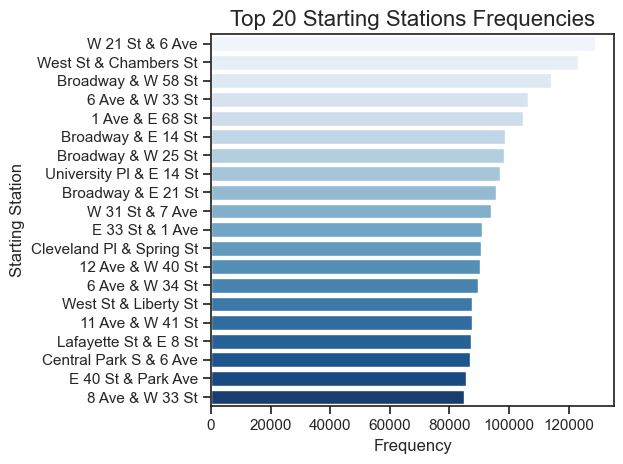

In [27]:
#Create the bar chart

sns.barplot(y=station_counts.index, hue=station_counts.index, x=station_counts.values, palette='Blues')

plt.title('Top 20 Starting Stations Frequencies', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Starting Station', fontsize=12)

plt.tight_layout() 
plt.show()

##### The theme and palette:
The theme and palette for this bar graph works well, but I want the colors to work in descending order from darkest to lightest.

In [34]:
sns.set_theme(style="whitegrid")

C:\Users\ariel\AppData\Local\Temp\ipykernel_18588\579019215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_counts.values, y=station_counts.index, palette=palette)


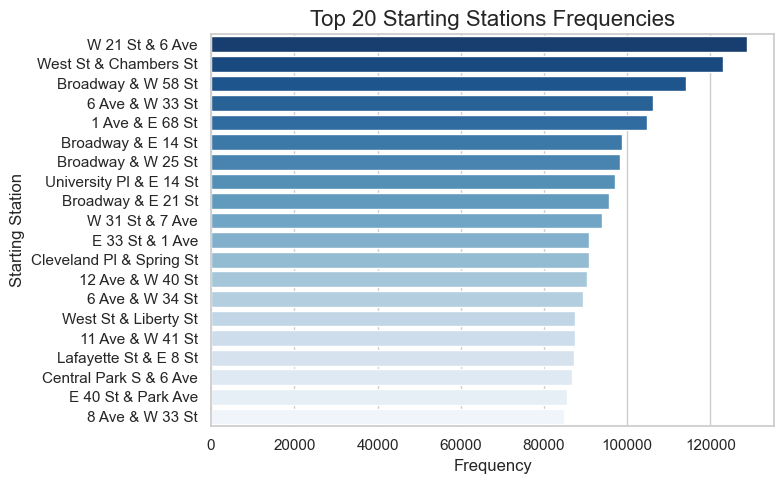

In [37]:
# Recreating the bar chart with the whitegrid theme instead of just white, changing the palette to work in descending order of frequency, and configuring the size of the chart

plt.figure(figsize=(8, 5))  
palette = sns.color_palette("Blues_r", len(station_counts)) 
sns.barplot(x=station_counts.values, y=station_counts.index, palette=palette)
plt.title('Top 20 Starting Stations Frequencies', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Starting Station', fontsize=12)
plt.tight_layout() 
plt.show()

In [30]:
# save the plot as a file
fig.savefig('Top_20_Starting_Stations.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

##### Improved:
This is more visually pleasing and a bigger bar graph makes it easier to see the differences in numbers. The white style and blue palette reversed works well for this. 

### Recreating dual axis plot from exercise 2.3 using seaborn (Temperature and Bike trips in 2022)

In [38]:
df.dtypes

ride_id                object
rideable_type          object
start_time             object
end_time               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
ride_duration         float64
end_year                int64
end_month               int64
end_day                 int64
end_weekday             int64
end_hour                int64
start_year              int64
start_month             int64
start_day               int64
start_weekday           int64
start_hour              int64
dtype: object

In [9]:
# Convert 'date' column to date format
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [10]:
# Create a randomized sample dataset using 5% of full dataset for this analysis
df_sample = df.sample(frac=0.05, random_state=42)

In [11]:
# Groupby the count of the rides 

df_group = pd.DataFrame(df_sample.groupby(['date'])['ride_id'].count()).reset_index()

In [12]:
df_group.head()

,date,ride_id
0,2022-01-01,1042
1,2022-01-02,2071
2,2022-01-03,1630
3,2022-01-04,1764
4,2022-01-05,1772


In [12]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df2 = df_sample.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df2['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df2[df2['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df2[df2['date'] == '2022-01-02'].shape) # Second check 

df_temp = df2.set_index('date')

print(df_temp.columns)

_merge
both          1488414
left_only           0
right_only          0
Name: count, dtype: int64
Shape of January 1st is (1042, 28)
Shape of January 2nd is (2071, 28)
Index(['ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'ride_duration', 'end_year', 'end_month',
       'end_day', 'end_weekday', 'end_hour', 'start_year', 'start_month',
       'start_day', 'start_weekday', 'start_hour', 'bike_rides_daily',
       '_merge'],
      dtype='object')


In [49]:
df_temp.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_day,end_weekday,end_hour,start_year,start_month,start_day,start_weekday,start_hour,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,D83AF928F9878288,classic_bike,2022-01-01 13:49:57.378,2022-01-01 13:55:48.027,Allen St & Stanton St,5484.09,E 11 St & Avenue B,5659.11,40.722055,-73.989111,...,1,5,13,2022,1,1,5,13,1042,both
2022-01-01,0E58589FA56572B6,classic_bike,2022-01-01 14:56:20.497,2022-01-01 14:57:24.775,E 85 St & York Ave,7146.04,E 85 St & York Ave,7146.04,40.775369,-73.948034,...,1,5,14,2022,1,1,5,14,1042,both
2022-01-01,60F0DCB12A6DD8DA,classic_bike,2022-01-01 16:42:49.227,2022-01-01 16:45:12.067,W 16 St & The High Line,6233.05,W 22 St & 10 Ave,6306.06,40.743349,-74.006818,...,1,5,16,2022,1,1,5,16,1042,both
2022-01-01,8EEBE5D308B3ED6A,classic_bike,2022-01-01 17:27:37.857,2022-01-01 17:33:47.527,Plaza St East & Flatbush Ave,4010.01,Flatbush Ave & Ocean Ave,3704.04,40.673134,-73.969106,...,1,5,17,2022,1,1,5,17,1042,both
2022-01-01,0ACB9A26880A773E,classic_bike,2022-01-01 01:06:30.245,2022-01-01 01:23:22.149,Front St & Gold St,4927.04,S 4 St & Wythe Ave,5204.05,40.702240,-73.982578,...,1,5,1,2022,1,1,5,1,1042,both


In [13]:
# Set a lower chunksize
plt.rcParams['agg.path.chunksize'] = 100000  # Lower value for chunksize

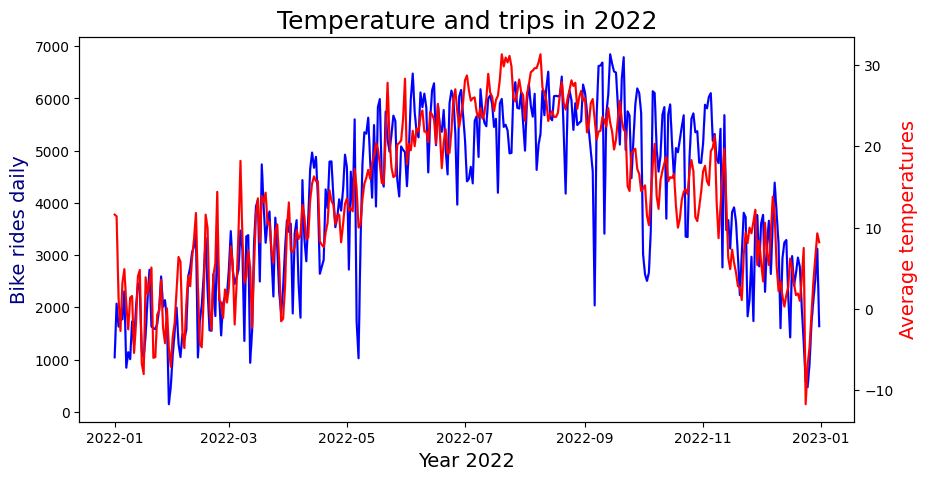

In [14]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) 
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) 

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

##### Using seaborn for the dual axis plot:
Using seaborn to execute the dual axis plot was more efficient, as I needed less code to execute it than using matplotlib alone. There is a spike in bike rides between July and September and it seems that the number of bike rides and temperatures stick fairly close together.

### Creating boxplot with a categorical column (Members by membership type: 'member_casual' column)

In [16]:
df.columns

Index(['ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'ride_duration', 'end_year',
       'end_month', 'end_day', 'end_weekday', 'end_hour', 'start_year',
       'start_month', 'start_day', 'start_weekday', 'start_hour'],
      dtype='object')

In [18]:
# Remove outliers in ride duration column
# Calculate the first and third quartiles of ride_duration
Q1 = df['ride_duration'].quantile(0.25)
Q3 = df['ride_duration'].quantile(0.75)
IQR = Q3 - Q1

In [19]:
# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
# Filter the dataset to remove rows with outliers in ride_duration
df_clean = df[(df['ride_duration'] >= lower_bound) & (df['ride_duration'] <= upper_bound)]

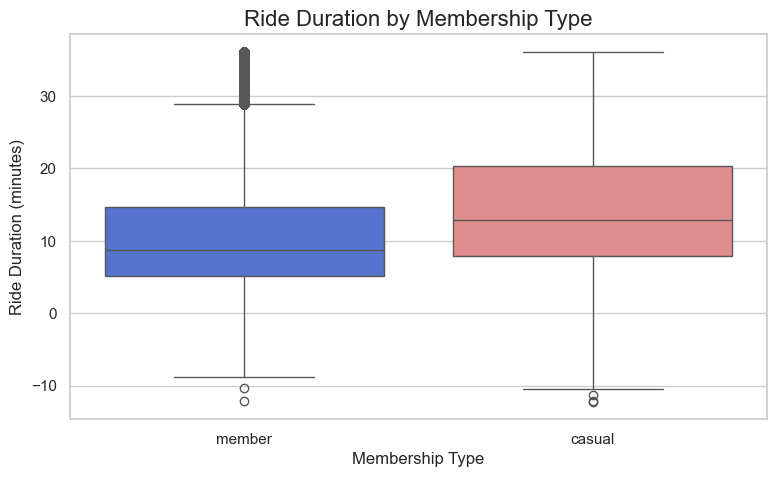

In [21]:
# Create the box plot comparing ride_duration by member_casual after removing outliers
plt.figure(figsize=(9, 5))
sns.boxplot(
    x='member_casual',  
    y='ride_duration',  
    data=df_clean,  
    palette={'member': 'royalblue', 'casual': 'lightcoral'}, 
    hue='member_casual', 
    legend=False  
)

plt.title('Ride Duration by Membership Type', fontsize=16)
plt.xlabel('Membership Type', fontsize=12)
plt.ylabel('Ride Duration (minutes)', fontsize=12)

plt.show()

##### Elements and insight from ride duration by membership type box plot:
This box plot depicts members and casual riders (non-members) by number of riders and ride duration. From looking at this box plot it would seem that casual bike users (non-members) take longer rides, and have a higher average ride duration. However, even after removing outliers, there seems to be a lot of data points for members above the outlier line, so assuming non-members take longer rides may not be accurate.

### Facet grids

In [23]:
# Set a lower chunksize
plt.rcParams['agg.path.chunksize'] = 100000  # Lower value for chunksize

In [25]:
# Remove outliers in ride duration column for sample dataset
# Calculate the first and third quartiles of ride_duration
Q1 = df_sample['ride_duration'].quantile(0.25)
Q3 = df_sample['ride_duration'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
# Filter the dataset to remove rows with outliers in ride_duration
df_sample_clean = df_sample[(df_sample['ride_duration'] >= lower_bound) & (df_sample['ride_duration'] <= upper_bound)]

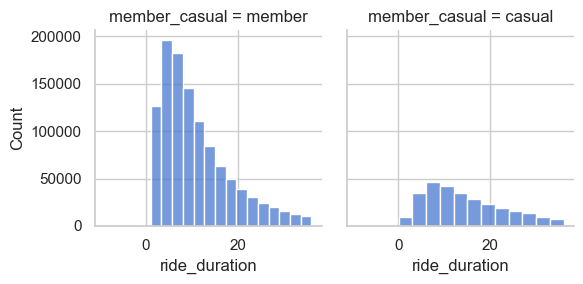

In [28]:
grid = sns.FacetGrid(df_sample_clean, col = "member_casual")
grid.map(sns.histplot, "ride_duration", bins = 15)
plt.show()

In [31]:
# save the plot as a file
fig.savefig('member_casual_ride_duration.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

##### Facetgrid output insight:
Although for this grid I had to use the sample set, this facetgrid definitely elaborates more on the number of riders that are members vs. non-members and ride duration more so than the box-plot. It is easier to see in this facetgrid that there are is a substantially higher amount of members versus non-members taking rides. The average ride duration for casual members may be higher because there a much lower count of riders in that category. Members may take shorter rides, but they are riding a lot more frequently, most likely for daily use for work, school, etc. which makes sense for people who are members. It is a great sign that Citibike has so many members, and I think finding out how to encourage longer rides for both members and casual riders would be beneficial.